In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
churn =pd.read_csv("sample-data/churn.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Print out the summary statistics of the sample data

In [4]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Visualize the data to find some kind of trend or something

In [5]:
# Styling
sns.set_style(style="whitegrid")
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of churn')

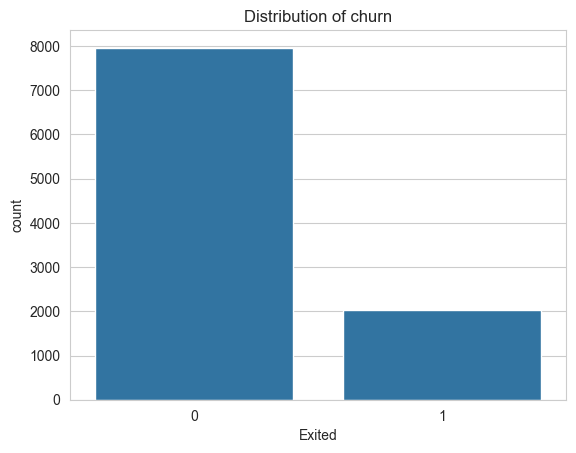

In [6]:
sns.countplot(x="Exited", data=churn)
plt.title("Distribution of churn")

Text(0.5, 1.0, 'Age Distribution')

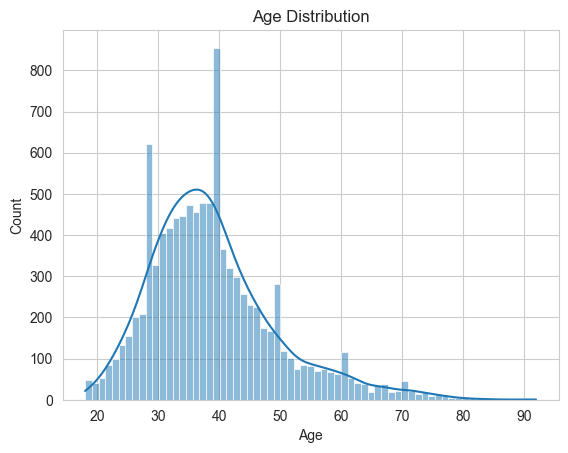

In [8]:
sns.histplot(x="Age", data=churn, kde=True)
plt.title("Age Distribution")

Peak is around 40s. Age groups of 50 and 60 have peaks, this may mean we have 2 Age groups

This is a scatterplot of the customers credit score vs their age, colored between whether the customer is churned or not

Text(0.5, 1.0, 'Credit Score VS Age')

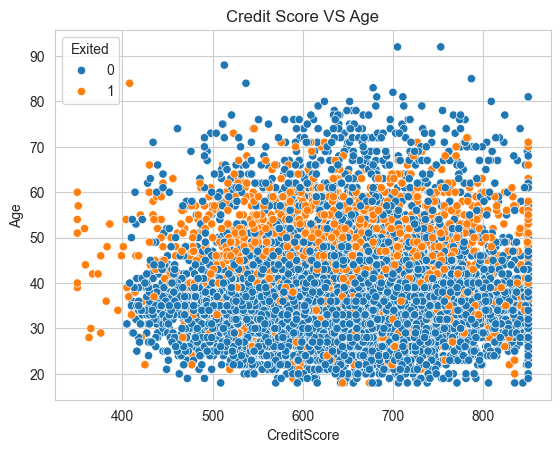

In [10]:
sns.scatterplot(data=churn, x="CreditScore", y="Age", hue="Exited")
plt.title("Credit Score VS Age")

There's no clear distiction between the age and the creditscore, but there is a trend between the ages who churn, namely those who between their 50s and their 60s thend to churn. Also it seems that those with an extremely low score bellow 400 tend to churn as well

### Boxplot of account balance separated by wether or not customer churned. This will show the difference between customers who did and didnt


Text(0.5, 1.0, 'Balance Distribution by Churn')

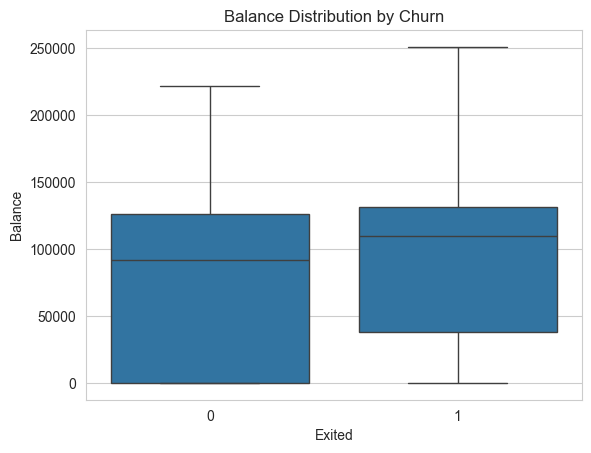

In [12]:
sns.boxplot(data=churn, x="Exited", y="Balance")
plt.title("Balance Distribution by Churn")

Those who have churned tend to have a higher balance than those who dont. Middle line is median, top is 75th percentile, line whiskers at the end are max and min

Text(0.5, 1.0, 'Creditscore Distribution by Churn')

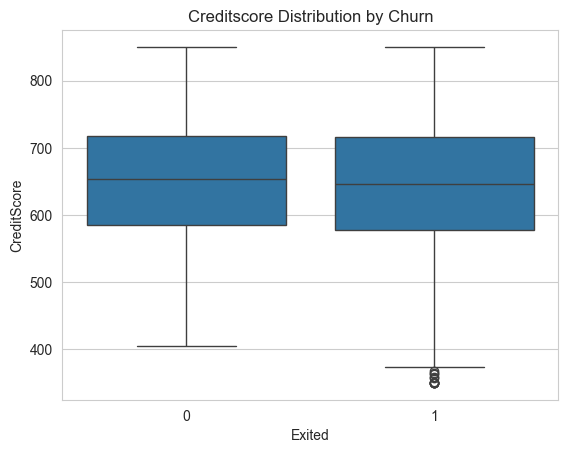

In [13]:
sns.boxplot(data=churn, x="Exited", y="CreditScore")
plt.title("Creditscore Distribution by Churn")

Barely any change, only note that those who have not churned have a slightly higher median credit score

## Preprosesing The data

1. Separate the features and the target variables

    The features represent the different attributes of the customer like their credit score, their balance, age, etc. The target variable in this case is if the customer has exited or not (churned or not churned)

In [23]:
features = churn.drop("Exited", axis=1)
target = churn["Exited"]

In [15]:
features.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

2. Remove unnecessary features. In this case, things like the row number, surname and customer id provide no information that could help us find a trend or could be of any use when training the machine learning algorithm

In [24]:
features = features.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1)
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


3. Drop rows with missing values in the data

In [25]:
features = features.dropna()
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


4. Convert your features into something numerical. Features like Geography and Gender are not numbers, we need to give some value. Gender for the sake of simplicity could be a binary value. For this project, I'm using a technique called "One-hot encoding". Basically categorical variables are converted into binary format, like what I mentioned previously with Gender.

In [26]:
features = pd.get_dummies(data=features, columns=["Geography", "Gender"])
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


# Training the ML

80% of the Dataset is used to train the ML and around 20% is for testing the thing. The dataset in hand is around 10k rows so 8k is used for training and 2k is used for testing

### Bonus

Instructor wants us to test this ratio to see how the model performs

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) # train the model at 80% and test with the 28%

Next step is to scale the feature to ensure all features contribute equally into the model. As of now, some features like credit score and salary have very different value sizes and that disperity can affect the model. Following the example, salary could contribute more than credit score. This could skew the model, not what we want. So we normalize it

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # scale training data
x_test = scaler.fit_transform(x_test)

In [31]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.73494238,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

Split the data into two sets
- Training set
- Testing set (smaller subset)

In [ ]:
x_train[0] # looking at the credit score row, a credit score of 686 got tranformed into 0.3564 and age of 32 got tranformed into -0.655

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  1.00150113, -0.57946723,
       -0.57638802, -0.91324755,  0.91324755])

Now that the data is preprossed, I can train the model. Will test different models

- logistics regression model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr_model = LogisticRegression(random_state=42)

train

In [36]:
lr_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

logistics regresion estimates the probability of than instance belong to a class, uses a sigmoid function. Useful for binary classification problems. threshhold is around y = 0.5, can vary depending on need. sigmoid functions maps any value between 0 and 1. for this case, 0 is for not churn, 1 is for churn, the closer you're to 1 the higher chance of churning, viceversa the closer you're at 0. x_trzain are scaled features and y_train is the target value.

now do a prediction

In [37]:
lr_predictions = lr_model.predict(x_test)
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

compare

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_accuracy

0.811

best models for tabular data is XGBoost. Builds models sequentially and corrects the errors of previous models. This is what instructor used during his work at Amazon.

Random Forest - is like asking a group of experts (decision making trees) for their opining and then taking a mayority vote. Each expert provides an opinion based on different parts of the data, and my combining these diverse perspectives we get more accurate predictions

Desision Tree - A decision tree is like a flow chart asking a series of yes or no questions about the data, where each question splits the data into the smaller groups, leading to a final decision at the end of the process

Naive Bayes - Makes predictions based the assumption that every feature independantly contributes to the outcome, even if that is not entirely true, allowing it to be fast and effective for many tasks especially with large datasets

K Nearest Neightbors - is like finding the closest points to a new dta point and predicting its group based on the mayotity group of its group of its nearest neightbors, making decisions purely based on similarities

Support Vector Machines - Is like drawing a line in the data that separates the two groups. `the goal is to find the boundary that not only separates the groups but also so  with the maximum margin between them, ensuring the model is more confiden in its clasification


We will test each model and compare its performance. Use pickle to save machine learning models

In [ ]:
import pickle

import xgboost as xg # note if you get an error and you're on a mac install brew and run brew install libomp
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [64]:
def evaluate_and_save_model(model, x_train, x_test, y_train, y_test, filename):
    model.fit(x_train, y_train)
    y_prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_prediction)
    print(f"{model.__class__.__name__}  Accuracy: {accuracy:.4f}")
    report = classification_report(y_test, y_prediction)
    print(f"---------------------------------------\nClassification Report:\n{report}\n---------------------------------------\n")
    
    with open(filename, "wb") as fb:
        pickle.dump(model, fb)
    print(f"Model saved as {filename}")
    return report
    

In [55]:
xgb_model = xg.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, x_train, x_test, y_train, y_test, "xgb_model.pkl")

XGBClassifier  Accuracy: 0.7455
---------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1607
           1       0.39      0.54      0.45       393

    accuracy                           0.75      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.78      0.75      0.76      2000

---------------------------------------

Model saved as xgb_model.pkl


In [56]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, x_train, x_test, y_train, y_test, "dt_model.pkl")

DecisionTreeClassifier  Accuracy: 0.7850
---------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.51      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.79      0.79      2000

---------------------------------------

Model saved as dt_model.pkl


In [57]:
rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, x_train, x_test, y_train, y_test, "rf_model.pkl")

RandomForestClassifier  Accuracy: 0.8645
---------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

---------------------------------------

Model saved as rf_model.pkl


In [58]:
nb_model = GaussianNB()
evaluate_and_save_model(nb_model, x_train, x_test, y_train, y_test, "nb_model.pkl")

GaussianNB  Accuracy: 0.8185
---------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1607
           1       0.56      0.38      0.45       393

    accuracy                           0.82      2000
   macro avg       0.71      0.65      0.67      2000
weighted avg       0.80      0.82      0.80      2000

---------------------------------------

Model saved as nb_model.pkl


In [59]:
knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, x_train, x_test, y_train, y_test, "knn_model.pkl")

KNeighborsClassifier  Accuracy: 0.8240
---------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.59      0.36      0.44       393

    accuracy                           0.82      2000
   macro avg       0.72      0.65      0.67      2000
weighted avg       0.80      0.82      0.81      2000

---------------------------------------

Model saved as knn_model.pkl


In [60]:
svm_model = SVC(random_state=42)
evaluate_and_save_model(svm_model, x_train, x_test, y_train, y_test, "svm_model.pkl")

SVC  Accuracy: 0.8560
---------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000

---------------------------------------

Model saved as svm_model.pkl


About the classification report

acc is not the best metric to use, it depends on the problem and context. In this context, accuracy is not a good metric because the dataset here is very inbalanced. Bellow is the number of rows that are churned and the rows that did not

In [63]:
churn.groupby("Exited").size()

Exited
0    7963
1    2037
dtype: int64

There is a significantly larger group of people who have not churned than a group of people who have not. That's why is better to look other metrics like
- F1 score (harmonic mean)
    - Precision
    - Recall

About precision

Prediction is a ratio of true possible predictions to the total number of positive predictions

Of all the customer the model predicted would churn, how many actually churned?

Out of 100 customers the model flagged as churned 80 customers actually churned. The precision is 80%. This means the model is accurate when it says a customer will churn


About Recall

Recall is a ratio to the posible predictions to the total number of actual churners

Of all the customers who actually churned, how many did the model correctly identify?

Example: Out of 100 actual churners, the model correctly predicted 90. The recall is 90%. This means the model is catching most of the customers who are likely to leave the bank


Why is this important?

- Precision helps you focus right when you predict churn, minimizing false positives
- Recall helps you catch as many actual churners as posible, minimizing false negatives.

This is useful especially for uneven data distributions because it takes into account false positives and false negatives


Depending on the business focus you could focus on one more than the other. If the company finds its to expensive to offer discounts and whatnot for customers who won't leave then prioritize precision where you only offer discounts for customers who are very likely to churn to maintain retention. If a churned customer is very expensive to lose then focus on recall to catch as many potential churners as possible.

For this case maximising recall would be the goal.


XGBClassifier would be the best at catching actual churners at 0.54.

Now rank which features are the most important ones to prioritize. XGBC has a ranking function so, using that

In [65]:
# extract feature importance
feature_importances = xgb_model.feature_importances_
feature_names = features.columns

In [66]:
feature_importances

array([0.03500515, 0.10955004, 0.03005428, 0.05278617, 0.32388842,
       0.03194036, 0.16414644, 0.03265523, 0.04646329, 0.09137332,
       0.0368547 , 0.04528258, 0.        ], dtype=float32)

In [67]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [68]:
f = pd.DataFrame({"feature": feature_names, 'importance': feature_importances})
f = f.sort_values('importance', ascending=False)
f

,feature,importance
4,NumOfProducts,0.323888
6,IsActiveMember,0.164146
1,Age,0.109550
9,Geography_Germany,0.091373
3,Balance,0.052786
8,Geography_France,0.046463
11,Gender_Female,0.045283
10,Geography_Spain,0.036855
0,CreditScore,0.035005
7,EstimatedSalary,0.032655


visualizing this better with bar charts

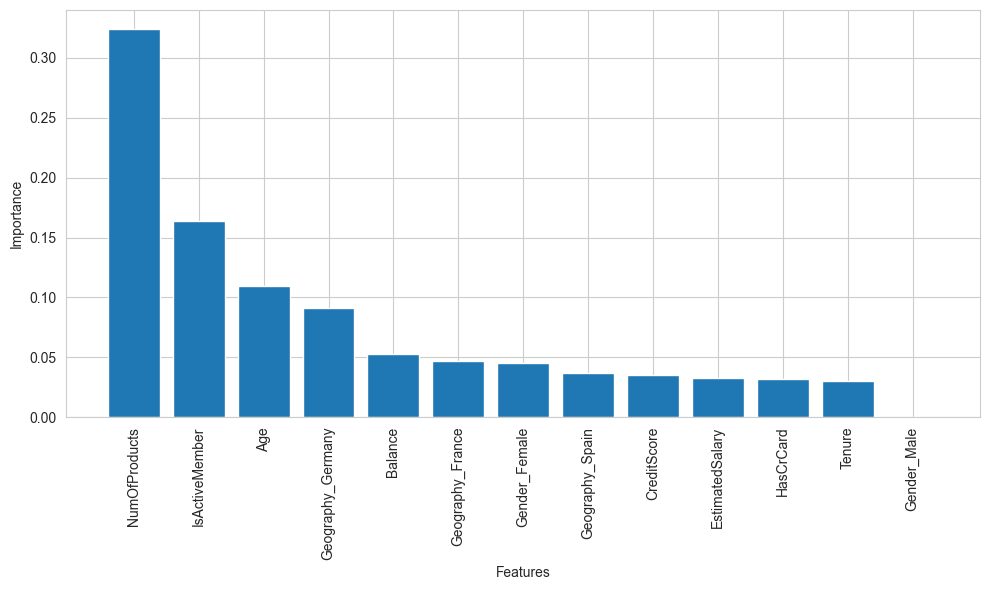

In [70]:
plt.figure(figsize=[10,6])
plt.bar(f['feature'], f['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Ways to improve Model Accuracy

Feature Engineering

Involves creating new features from the existing ones to help the model learn better. We can do this by combining the existing features in differeint ways or by creating new features that are a functions of the existing ones.

SMOTE or Syntethic MInority Over-sampling Technique

This involves creating new syntethic data for the minority class in the dataset (in this case customers who are going to churn) to help the model learn better. It's a process of creating new synthetic daata for the minority class by selecting the most important features to use in the m odel. This process is repeated until the minority class is balanced with the mayority class.

Ensembling

This is like asking multiple experts for their opining and then taking a mayority vote. Its a process of combining the predictions of multiple model sto create a new model that is better thanm the invididual models. This healps us gret the best of multuiple models in order to get more accurate predictions

Also there's hyperparameter tuning, but according to the instructor this will be shown on the next project


Doing the feature engineering thingy, doing a new feature called customer lifetime value, categorizing the customers by age groups

lifetime value = current balance * salary / 100,000

In [71]:
features['CLV'] = churn['Balance'] * churn['EstimatedSalary'] / 100000
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344


In [72]:
features['AgeGroup'] = pd.cut(churn['Age'], bins=[0,30,45,60,100], labels=["Young", "MiddleAge", "Senior", "Elderly"])
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,MiddleAge
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,MiddleAge
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,MiddleAge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,MiddleAge
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,MiddleAge


next feature is tenure of age ratio, provides insight on customer's loyalty

In [73]:
features['TenureAgeRatio'] = churn['Tenure'] / churn['Age']
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup,TenureAgeRatio
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge,0.047619
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,MiddleAge,0.024390
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,MiddleAge,0.190476
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge,0.025641
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,MiddleAge,0.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge,0.128205
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,MiddleAge,0.285714
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge,0.194444
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,MiddleAge,0.071429


Now we do the same dummies thingy to make the agegroup colum into binary values

In [74]:
features = pd.get_dummies(features, drop_first=True)
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Elderly
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,0.047619,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,0.024390,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,0.190476,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,0.025641,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,0.046512,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,0.128205,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,0.285714,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,0.194444,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,0.071429,True,False,False


separing the training data from the testing, same ratio n all as before

In [76]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(features, target, test_size=0.2, random_state=42)
x_test_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Elderly
6252,596,32,3,96709.07,2,0,0,41788.37,False,True,False,False,True,40413.143995,0.093750,True,False,False
4684,623,43,1,0.00,2,1,1,146379.30,True,False,False,False,True,0.000000,0.023256,True,False,False
1731,601,44,4,0.00,2,1,0,58561.31,False,False,True,True,False,0.000000,0.090909,True,False,False
4742,506,59,8,119152.10,2,1,1,170679.74,False,True,False,False,True,203368.494485,0.135593,False,True,False
4521,560,27,7,124995.98,1,1,1,114669.79,False,False,True,True,False,143332.627774,0.259259,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268.84,1,0,1,45038.29,False,True,False,True,False,44258.605139,0.094340,False,True,False
8285,609,25,10,0.00,1,0,1,109895.16,True,False,False,False,True,0.000000,0.400000,False,False,False
7853,730,47,7,0.00,1,1,0,33373.26,True,False,False,True,False,0.000000,0.148936,False,True,False
1095,692,29,4,0.00,1,1,0,76755.99,True,False,False,False,True,0.000000,0.137931,False,False,False


Since XGBoost is the best one dealing with Recall, using that again

In [77]:
xgboost_model_new = xg.XGBClassifier(random_state=42)
report = evaluate_and_save_model(xgboost_model_new, x_train_new, x_test_new, y_train_new, y_test_new, "xgboost-feature-engineering.pkl")

XGBClassifier  Accuracy: 0.8540
---------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000

---------------------------------------

Model saved as xgboost-feature-engineering.pkl


So, a few things. First the recall for the churned customers got lower, which is exactly the oposite of what the goal is. Interestingly, the precision got much higher and the accuracy as well. So if the goal was to get precision this would be the right direction, but we're looking recall so we need to do other stuff instead. 

Now, trying SMOTE

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
smote =  SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train_new, y_train_new)
x_resampled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Elderly
0,686,32,6,0.000000,2,1,1,179093.260000,True,False,False,False,True,0.000000,0.187500,True,False,False
1,632,42,4,119624.600000,2,1,1,195978.860000,False,True,False,False,True,234438.927360,0.095238,True,False,False
2,559,24,3,114739.920000,1,1,0,85891.020000,False,False,True,False,True,98551.287635,0.125000,False,False,False
3,561,27,9,135637.000000,1,1,0,153080.400000,True,False,False,True,False,207633.662148,0.333333,False,False,False
4,517,56,9,142147.320000,1,0,0,39488.040000,True,False,False,False,True,56131.190581,0.160714,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12707,680,45,6,138664.343105,1,0,1,1669.789623,True,True,False,True,True,2294.475108,0.139889,True,True,False
12708,730,43,8,0.000000,1,0,0,199220.081437,False,False,True,True,True,0.000000,0.201548,True,False,False
12709,769,32,2,0.000000,1,1,0,193872.703755,True,False,True,True,True,0.000000,0.067343,True,False,False
12710,678,46,8,107135.399805,1,0,0,137130.699174,False,True,False,True,False,146910.454113,0.194402,True,True,False


In [80]:
report_2 = evaluate_and_save_model(xgboost_model_new, x_resampled, x_test_new, y_resampled, y_test_new, "xgboost-SMOTE.pkl")

XGBClassifier  Accuracy: 0.8545
---------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.55      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.85      0.85      0.85      2000

---------------------------------------

Model saved as xgboost-SMOTE.pkl


Next technique, ensambling, use a voting classifier, a ml model that combines predictions of different models together

soft voting - clasifier will weight the invididual models by their acc

hard voting - clasifier will take mayority of the individual models

In [81]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ("xgboost", xg.XGBClassifier(random_state=42)),
        ("rf", RandomForestClassifier(random_state=42)),
        ("svm", SVC(random_state=42, probability=True))
    ],
    voting="hard"
)

In [ ]:
evaluate_and_save_model(voting_clf, x_resampled, x_test_new, y_resampled, y_test_new, "xgboost-voting_clf.pkl")


VotingClassifier  Accuracy: 0.8530
---------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.63      0.59      0.61       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000

---------------------------------------

Model saved as xgboost-voting_clf.pkl


'              precision    recall  f1-score   support\n\n           0       0.90      0.92      0.91      1607\n           1       0.63      0.59      0.61       393\n\n    accuracy                           0.85      2000\n   macro avg       0.77      0.75      0.76      2000\nweighted avg       0.85      0.85      0.85      2000\n'